In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\train (1).csv",usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Before vs After 

Text(0.5, 1.0, 'Age QQ Plot')

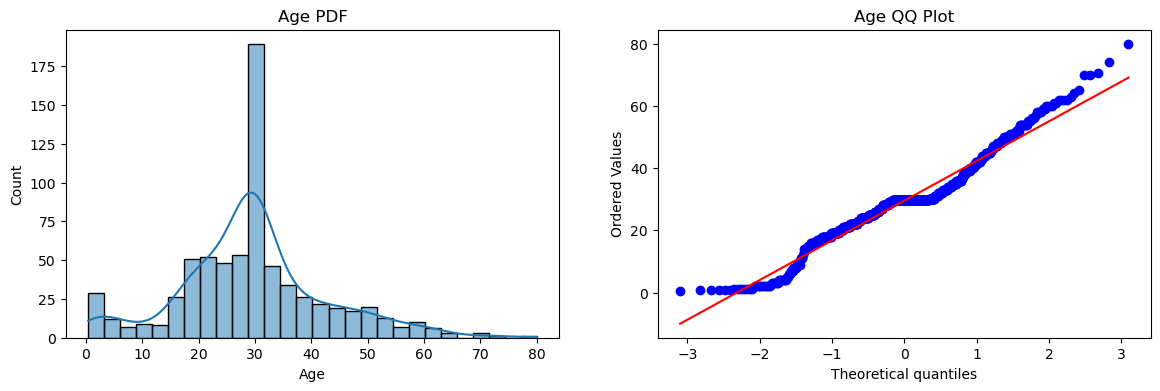

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')
plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

Text(0.5, 1.0, 'QQ Plot')

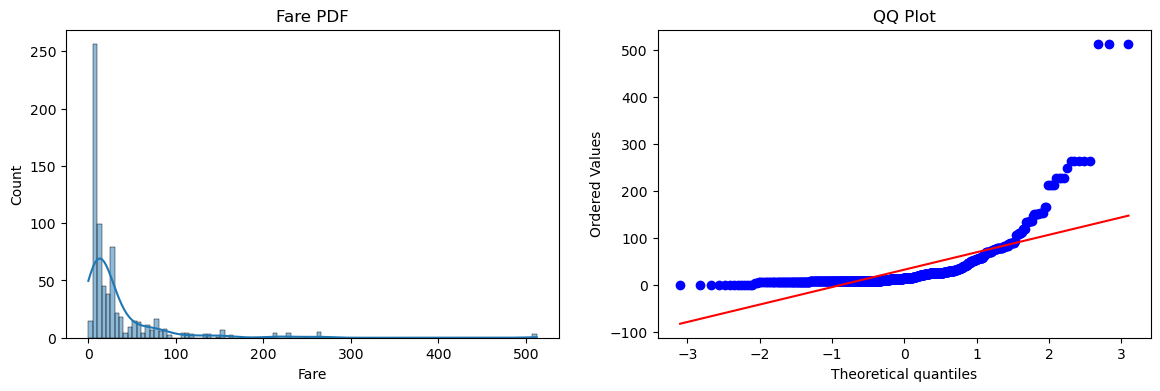

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('QQ Plot')

# regression and decision trees

In [12]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
y_pred=clf.predict(X_test)

In [15]:
y_pred1=clf2.predict(X_test)

In [16]:
print(accuracy_score(y_pred,y_test))
print(accuracy_score(y_pred1,y_test))

0.6480446927374302
0.664804469273743


 # FunctionTransformer

In [17]:
trf=FunctionTransformer(func=np.log1p)


In [47]:
X_train_transformed=trf.fit_transform(X_train,y_train)
X_test_transformed=trf.transform(X_test)
X_test_transformed

,Age,Fare
709,3.424234,2.787834
439,3.465736,2.442347
840,3.044522,2.188856
720,1.945910,3.526361
39,2.708050,2.504848
...,...,...
433,2.890372,2.094946
773,3.424234,2.107178
25,3.663562,3.477773
84,2.890372,2.442347


In [19]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [20]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

In [22]:
print(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred1))

0.6815642458100558
0.6703910614525139


In [23]:
#there is a sudden improvement in the score of logistic regression 


In [27]:
#cross validation 
X_transformed =trf.fit_transform(X)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
print("LR:",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10 )))
print("dc:",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10 )))     

LR: 0.678027465667915
dc: 0.6532709113607991


In [30]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')
X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.fit_transform(X_test)
X_train_transformed2

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]])

In [34]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()  #in main dono vairables aate hai 
clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)



DecisionTreeClassifier()

In [46]:
X_transformed2=trf2.fit_transform(X)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()
print("Accuracy:", np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("Accuracy:", np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

Accuracy: 0.6712609238451936
Accuracy: 0.6622222222222222
